In [148]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
plt.style.use('fivethirtyeight')

In [149]:
# importing the data
df= pd.read_csv(r'INFY_TRAINING.csv')
df= df.set_index(pd.DatetimeIndex(df['Date'].values))

In [150]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
2016-08-01,2016-08-01,537.000000,543.750000,534.500000,542.500000,473.584595,583158
2016-08-02,2016-08-02,544.950012,544.950012,538.025024,542.150024,473.279083,392734
2016-08-03,2016-08-03,542.500000,543.625000,536.000000,542.500000,473.584595,321388
2016-08-04,2016-08-04,545.000000,545.000000,535.000000,536.075012,467.975769,416868
2016-08-05,2016-08-05,532.500000,537.000000,525.500000,533.700012,465.902557,469326
...,...,...,...,...,...,...,...
2019-07-24,2019-07-24,789.500000,793.299988,783.650024,786.049988,741.814026,345353
2019-07-25,2019-07-25,787.000000,800.250000,787.000000,795.049988,750.307495,327591
2019-07-26,2019-07-26,793.000000,794.700012,782.700012,787.299988,742.993591,293235
2019-07-29,2019-07-29,787.549988,796.849976,786.400024,791.549988,747.004456,272313


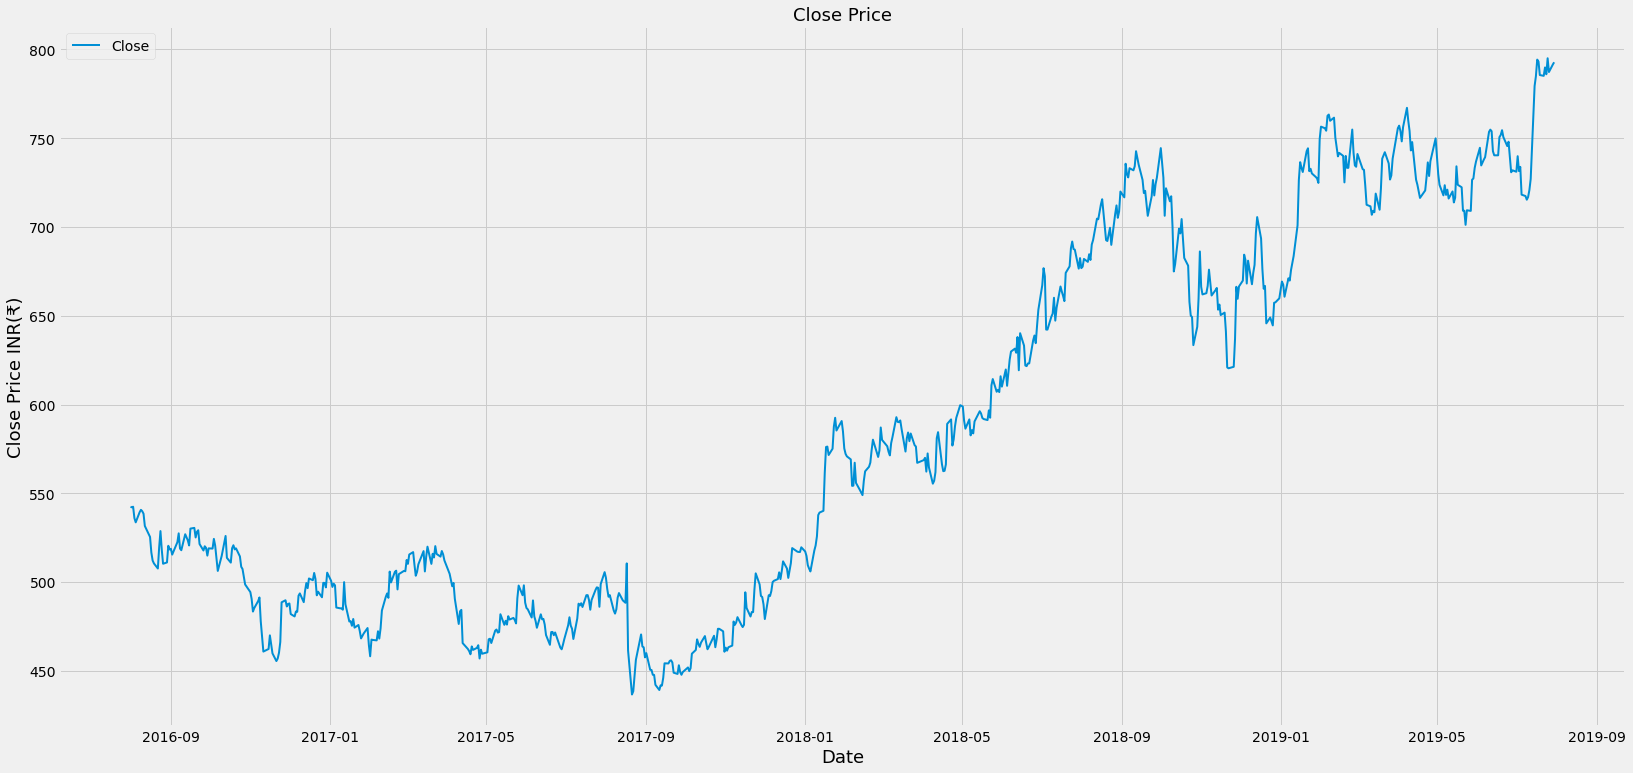

In [151]:
# Visualizing the data
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'], label= 'Close',linewidth=2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

# Simple Moving Average

In [152]:
# Creating new dataset
data = pd.DataFrame()
data['Date'] = df['Date']
data['Close'] = df['Close']
data['SMA15'] = df['Close'].rolling(window=15).mean()
data['SMA89'] = df['Close'].rolling(window=89).mean()
data

,Date,Close,SMA15,SMA89
2016-08-01,2016-08-01,542.500000,NaN,NaN
2016-08-02,2016-08-02,542.150024,NaN,NaN
2016-08-03,2016-08-03,542.500000,NaN,NaN
2016-08-04,2016-08-04,536.075012,NaN,NaN
2016-08-05,2016-08-05,533.700012,NaN,NaN
...,...,...,...,...
2019-07-24,2019-07-24,786.049988,756.560006,737.416292
2019-07-25,2019-07-25,795.049988,760.636670,738.381460
2019-07-26,2019-07-26,787.299988,765.240002,739.268539
2019-07-29,2019-07-29,791.549988,770.180001,740.085393


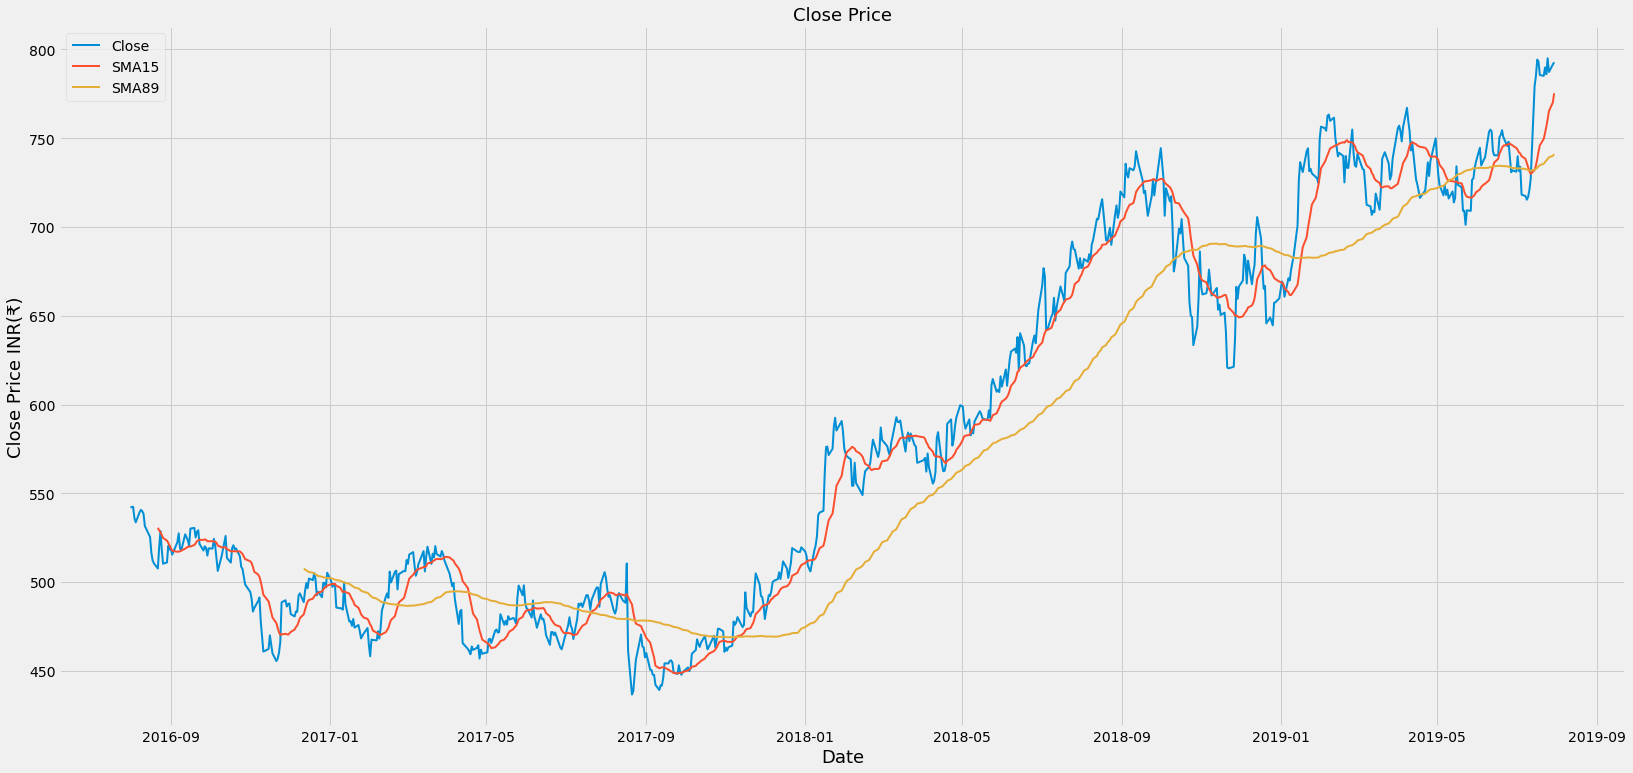

In [153]:
# Plotting all data 
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(data['Close'], label= 'Close', lw=2.0)
plt.plot(data['SMA15'], label = 'SMA15', lw = 2.0)
plt.plot(data['SMA89'], label = 'SMA89', lw = 2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [154]:
# function to determine buy sell signal price using SMA15 and SMA89
def buy_sell_sma(data):
    sigPriceBuy= []
    sigPriceSell= []
    flag= -1

    for i in range(len(data)):
        if data['SMA15'][i] < data['SMA89'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Close'][i])
                sigPriceSell.append(np.nan)
                flag=1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA15'][i] > data['SMA89'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Close'][i])
                flag=0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return(sigPriceBuy,sigPriceSell)

In [155]:
buy_sell = buy_sell_sma(data)
data['Buy_Signal_Price']= buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

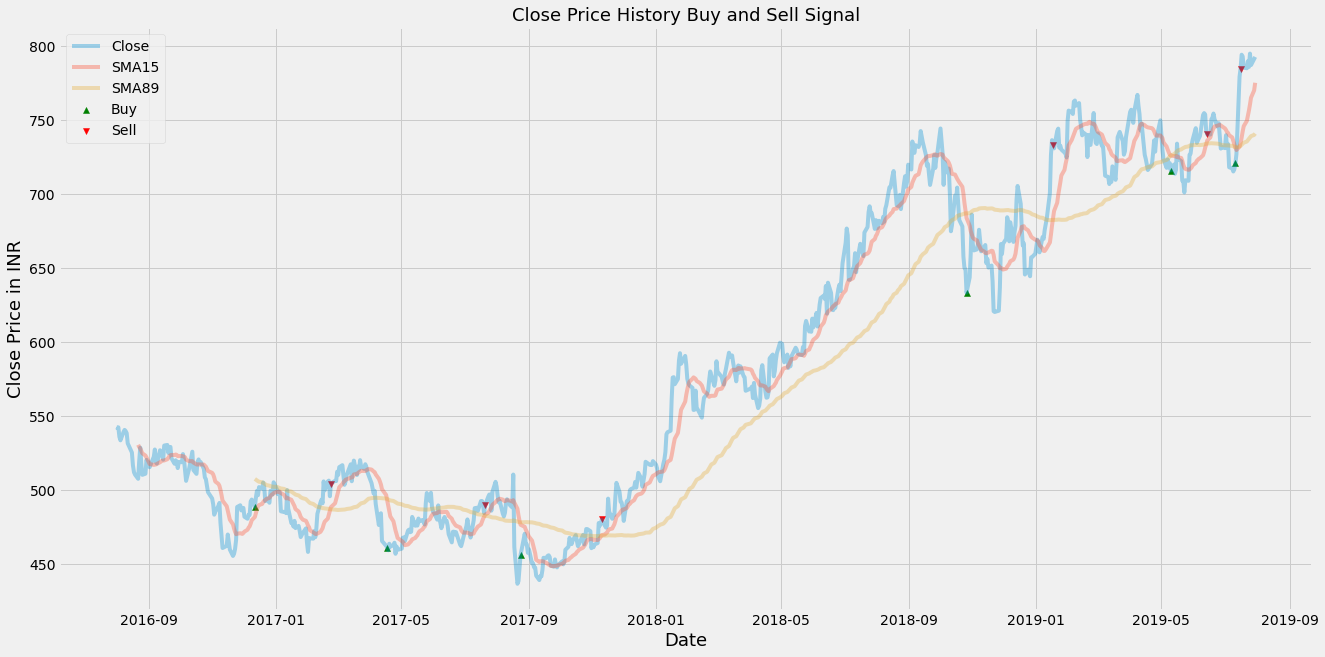

In [156]:
# plotting the buy-sell signals on the graph
plt.figure(figsize=(20,10))
plt.title('Close Price History Buy and Sell Signal', fontsize=18)
plt.plot(data['Close'], label= 'Close', alpha= 0.35)
plt.plot(data['SMA15'], label= 'SMA15', alpha= 0.35)
plt.plot(data['SMA89'], label= 'SMA89', alpha= 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label= 'Buy', marker= '^', color= 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label= 'Sell', marker= 'v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [157]:
# Writing the buy sell signals in a file

f = open('Output_sma.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (len(data)):
    if (not np.isnan(data['Buy_Signal_Price'][i])) or (not np.isnan(data['Sell_Signal_Price'][i])):
        row= [data['Date'][i], data['Buy_Signal_Price'][i], data['Sell_Signal_Price'][i]]
        writer.writerow(row)
f.close()

In [158]:
# Given that initial capital = 100000
capital = 100000


In [160]:
# importing the buy sell signals
sigData= pd.read_csv(r'Output_sma.csv')
sigData= sigData.set_index(pd.DatetimeIndex(sigData['Date'].values))
sigData

,Date,Buy,Sell,Stocks Bought,Sell Price,Return%
2016-12-12,2016-12-12,488.750000,NaN,NaN,NaN,NaN
2017-02-23,2017-02-23,NaN,504.524994,NaN,NaN,NaN
2017-04-18,2017-04-18,461.200012,NaN,NaN,NaN,NaN
2017-07-21,2017-07-21,NaN,489.950012,NaN,NaN,NaN
2017-08-24,2017-08-24,456.250000,NaN,NaN,NaN,NaN
2017-11-10,2017-11-10,NaN,480.299988,NaN,NaN,NaN
2018-10-26,2018-10-26,633.500000,NaN,NaN,NaN,NaN
2019-01-17,2019-01-17,NaN,733.400024,NaN,NaN,NaN
2019-05-10,2019-05-10,716.049988,NaN,NaN,NaN,NaN
2019-06-14,2019-06-14,NaN,740.400024,NaN,NaN,NaN


In [182]:
stocks = 0
buy_signal = 1
sell_signal = 0
sigData['Stocks Bought'][0] = np.int(capital/sigData['Buy'][0] * 99/100)
for i in range (1, len(sigData)):
    if not np.isnan(sigData['Buy'][i]):
        buy_signal = buy_signal + 1
        stocks = np.int(sigData['Sell Price'][i-1]/sigData['Buy'][i] * 99/100)
        sigData['Stocks Bought'][i] = stocks
    elif not np.isnan(sigData['Sell'][i]):
        sell_signal = sell_signal + 1
        sp = sigData['Stocks Bought'][i-1] * sigData['Sell'][i] * 99/100
        sigData['Sell Price'][i] = sp
        returnPercent = (sp - capital)/capital * 100
        sigData['Return%'][i] = returnPercent

/tmp/ipykernel_4302/3812024943.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigData['Stocks Bought'][0] = np.int(capital/sigData['Buy'][0] * 99/100)
/tmp/ipykernel_4302/3812024943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigData['Stocks Bought'][0] = np.int(capital/sigData['Buy'][0] * 99/100)
/tmp/ipykernel_4302/3812024943.py:13: SettingWithCopy

In [183]:
sigData

,Date,Buy,Sell,Stocks Bought,Sell Price,Return%
2016-12-12,2016-12-12,488.750000,NaN,202.0,NaN,NaN
2017-02-23,2017-02-23,NaN,504.524994,NaN,100894.908300,0.894908
2017-04-18,2017-04-18,461.200012,NaN,216.0,NaN,NaN
2017-07-21,2017-07-21,NaN,489.950012,NaN,104770.910566,4.770911
2017-08-24,2017-08-24,456.250000,NaN,227.0,NaN,NaN
2017-11-10,2017-11-10,NaN,480.299988,NaN,107937.816303,7.937816
2018-10-26,2018-10-26,633.500000,NaN,168.0,NaN,NaN
2019-01-17,2019-01-17,NaN,733.400024,NaN,121979.091992,21.979092
2019-05-10,2019-05-10,716.049988,NaN,168.0,NaN,NaN
2019-06-14,2019-06-14,NaN,740.400024,NaN,123143.331992,23.143332


In [190]:
# Write in Output file

f = open('Output_sma.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (0, len(sigData)):
    row= [sigData['Date'][i], sigData['Buy'][i], sigData['Sell'][i], sigData['Stocks Bought'][i], sigData['Sell Price'][i], sigData['Return%'][i]]
    writer.writerow(row)
f.close()

In [188]:
# Calculating benchmark return

benchmark = capital * data['Close'][-1]/data['Close'][0]
benchmarkPercent = (benchmark-capital)/capital * 100

# Calculate final return Percent
returnPercent = sigData['Return%'][-1]

print('Benchmark return = ', benchmarkPercent, '%')
print('Actual Return = ', returnPercent , '%')

Benchmark return =  46.1382466359447 %
Actual Return =  31.329986507719994 %


In [187]:
# Number of Buy and Sell signals generated
print('Number of Buy Signals = ', buy_signal)
print('Number of sell signals = ', sell_signal)

Number of Buy Signals =  6
Number of sell signals =  6
